### FIRST WE NEED TO IMPORT THE DATA AND TRAIN THE CNN

In [1]:

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = os.path.join("C:\\Users\\Kiran gowda.A\\Downloads\\archive\\Data\\train")
test_dir = os.path.join("C:\\Users\\Kiran gowda.A\\Downloads\\archive\\Data\\test")

if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory not found: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory not found: {test_dir}")

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
            

Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.


In [2]:

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join("C:\\Users\\Kiran gowda.A\\Downloads\\archive\\Data\\train")
test_dir = os.path.join("C:\\Users\\Kiran gowda.A\\Downloads\\archive\\Data\\test")

if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory not found: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory not found: {test_dir}")

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
            

Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.


In [3]:
image_size = (224, 224)

def resize_image(image, size=image_size):
    return cv2.resize(image, size)


In [4]:
def normalize_image(image):
    return image / 255.0


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [6]:
from sklearn.preprocessing import LabelEncoder

labels = ['normal', 'pneumonia', 'covid-19', 'normal', 'covid-19', 'pneumonia']

label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(labels)

print(f"Encoded Labels: {encoded_labels}")


Encoded Labels: [1 2 0 1 0 2]


In [7]:

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join("C:\\Users\\Kiran gowda.A\\Downloads\\archive\\Data\\train")
test_dir = os.path.join("C:\\Users\\Kiran gowda.A\\Downloads\\archive\\Data\\test")

if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory not found: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory not found: {test_dir}")

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
            

Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.


In [8]:

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join("C:\\Users\\Kiran gowda.A\\Downloads\\archive\\Data\\train")
test_dir = os.path.join("C:\\Users\\Kiran gowda.A\\Downloads\\archive\\Data\\test")

if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory not found: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory not found: {test_dir}")

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
            

Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.


In [9]:
print(train_generator.class_indices)


{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


C:\Users\Kiran gowda.A\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5
)


C:\Users\Kiran gowda.A\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.7139 - loss: 1.4416 - val_accuracy: 0.9222 - val_loss: 0.2663
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.9036 - loss: 0.2514 - val_accuracy: 0.9484 - val_loss: 0.1702
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.9221 - loss: 0.2011 - val_accuracy: 0.9446 - val_loss: 0.1899
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.9349 - loss: 0.1747 - val_accuracy: 0.9504 - val_loss: 0.1537
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.9533 - loss: 0.1353 - val_accuracy: 0.9523 - val_loss: 0.1414


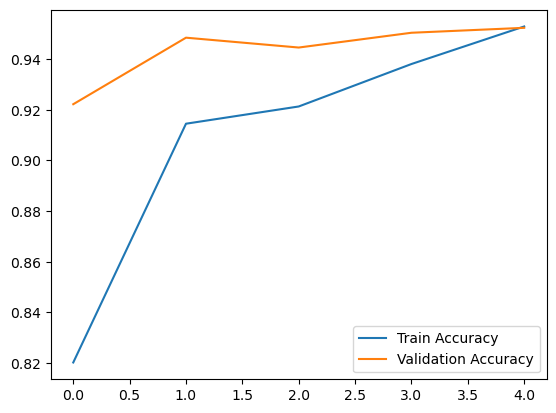

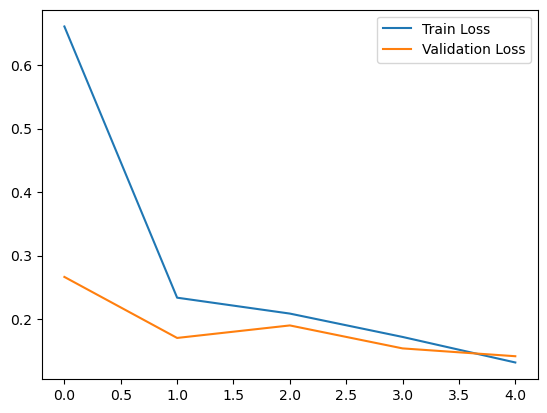

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [13]:
model.save('covid_pneumonia_classifier.h5')


In [14]:

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = os.path.join("C:\\Users\\Kiran gowda.A\\Downloads\\archive\\Data\\train")
test_dir = os.path.join("C:\\Users\\Kiran gowda.A\\Downloads\\archive\\Data\\test")

if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory not found: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory not found: {test_dir}")

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
            

Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.


In [17]:
test_generator = datagen.flow_from_directory(
    test_dir,  
    target_size=(150, 150), 
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)


Found 1288 images belonging to 3 classes.


In [18]:
import numpy as np

In [19]:

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  

from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
              precision    recall  f1-score   support

     COVID19       0.98      0.89      0.93       116
      NORMAL       0.89      0.91      0.90       317
   PNEUMONIA       0.96      0.97      0.96       855

    accuracy                           0.95      1288
   macro avg       0.94      0.92      0.93      1288
weighted avg       0.95      0.95      0.95      1288



In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

app = Flask(__name__)
model = load_model('covid_pneumonia_classifier.h5')  # Load your trained model
class_indices = {0: "COVID", 1: "Pneumonia", 2: "Normal"}  # Adjust as per your classes

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({"error": "No file uploaded"}), 400
    
    # Load and preprocess the image
    file = request.files['file']
    img = image.load_img(file, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = class_indices[np.argmax(predictions)]
    return jsonify({"prediction": predicted_class})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1